In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from Subset_Model import RGCCA

In [3]:
data_dir = "/home/ng255707/Documents/Parsimony/Glioma_Data/"

# Exp 1: GraphTV + L1

Sur le jeu de donnée réduites (4341 gènes en GE présents dans les pathways Kegg, 1229 segments CGH), recherche de paramètres par 5-fold GridSearchCV. Le modèle CCA à 3 blocs (hiérarchique) est contraint par:
- Sur le bloc GE:
    - Contrainte L1 (param_l1)
    - Contrainte RGCCA (tau = 1 par SS)
    - Contrainte GraphTV avec KeggGraph (param_g1)
- Sur le bloc CGH:
    - Contrainte L1 (param_l2)
    - Contrainte RGCCA (tau = 0.77 par SS)
- Sur le bloc Y: Contrainte RGCCA tau = 0 par SS

Les données sont standardisée avant la CCA. Le modèle est évalué avec le score de classification de la localisation par une LDA. Le script pour cette expérience est Subset_Model.py

In [97]:
results = pd.read_csv(data_dir + 'Subset_CV_GraphTV.csv').drop('Unnamed: 0',axis=1)
best_mod = np.load(data_dir + 'best_estimator_CV_GraphTV.npy').item().steps[1][1]

In [98]:
p = results.mean_test_score.max()
results.loc[results.mean_test_score == p].drop('params',axis=1).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_rgcca__g1,param_rgcca__l1,param_rgcca__l2,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,185.990887,0.003723,0.566038,0.867774,10.0,1.000000e+15,10.0,1,0.454545,0.809524,...,0.727273,0.880952,0.3,0.883721,0.6,0.883721,34.363631,0.000654,0.164142,0.029151
4,192.969329,0.003274,0.566038,0.867774,10.0,1.000000e+13,10.0,1,0.454545,0.809524,...,0.727273,0.880952,0.3,0.883721,0.6,0.883721,30.167178,0.000555,0.164142,0.029151
8,191.944358,0.004143,0.566038,0.867774,10.0,1.000000e+11,10.0,1,0.454545,0.809524,...,0.727273,0.880952,0.3,0.883721,0.6,0.883721,15.129045,0.000618,0.164142,0.029151
12,114.825934,0.003177,0.566038,0.867774,10.0,1.000000e+09,10.0,1,0.454545,0.809524,...,0.727273,0.880952,0.3,0.883721,0.6,0.883721,25.268081,0.001466,0.164142,0.029151
20,138.810567,0.005053,0.566038,0.867774,10.0,1.000000e+05,10.0,1,0.454545,0.809524,...,0.727273,0.880952,0.3,0.883721,0.6,0.883721,10.138995,0.003679,0.164142,0.029151


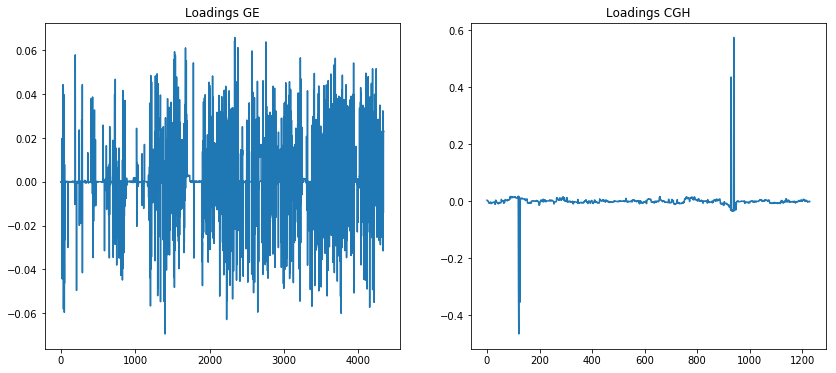

In [99]:
w = best_mod.w
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(w[0])
plt.title('Loadings GE')
plt.subplot(122)
plt.plot(w[1])
plt.title('Loadings CGH');

Number of significant contributions: (1323,)


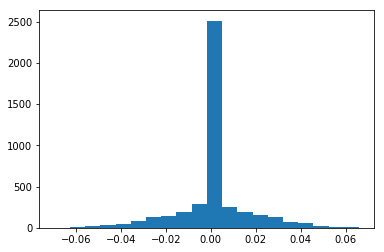

In [100]:
print 'Number of significant contributions: {}'.format(np.where(abs(w[0]) > 1e-2)[0].shape)
plt.hist(w[0],bins=20);

In [101]:
best_mod.info

{'converged': False, 'num_iter': [10174, 74, 22]}

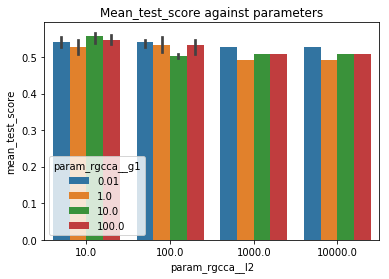

In [42]:
sns.barplot(y='mean_test_score',x='param_rgcca__l2',hue='param_rgcca__g1',data=results)
plt.title('Mean_test_score against parameters');

Results are all bad regardless the parameters, and there is a huge gap between training and test score: better results were obtained with no L1 constraint on the GE block.

# Exp 2: GraphTV

Sur le jeu de donnée réduites (4341 gènes en GE présents dans les pathways Kegg, 1229 segments CGH), recherche de paramètres par 5-fold GridSearchCV. Le modèle CCA à 3 blocs (hiérarchique) est contraint par:
- Sur le bloc GE:
    - Contrainte L1 (param_l1)
    - Contrainte RGCCA (tau = 1 par SS)
    - Contrainte GraphTV avec KeggGraph (param_g1)
- Sur le bloc CGH:
    - Contrainte L1 (param_l2)
    - Contrainte RGCCA (tau = 0.77 par SS)
- Sur le bloc Y: Contrainte RGCCA tau = 0 par SS

Les données sont standardisée avant la CCA. Le modèle est évalué avec le score de classification de la localisation par une LDA. Le script pour cette expérience est Subset_Model.py

In [102]:
results = pd.read_csv(data_dir + 'Subset_CV_GraphTV_sansL1.csv').drop('Unnamed: 0',axis=1)
best_mod = np.load(data_dir + 'best_estimator_CV_GraphTV_sansL1.npy').item().steps[1][1]

In [103]:
p = results.mean_test_score.max()
results.loc[results.mean_test_score == p].drop('params',axis=1).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_rgcca__g1,param_rgcca__l2,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
30,154.471562,0.002864,0.773585,0.844408,500.0,1,1,0.909091,0.833333,0.909091,...,0.636364,0.904762,0.7,0.837209,0.7,0.837209,9.172075,0.001263,0.116504,0.031893


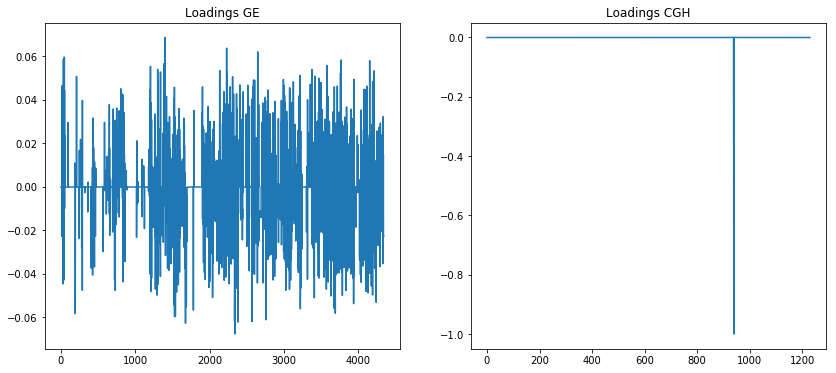

In [104]:
w = best_mod.w
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(w[0])
plt.title('Loadings GE')
plt.subplot(122)
plt.plot(w[1])
plt.title('Loadings CGH');

In [105]:
best_mod.info

{'converged': False, 'num_iter': [20000, 25, 22]}

Number of significant contributions: (1320,)


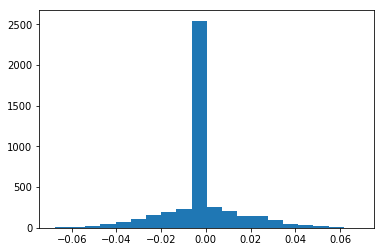

In [106]:
print 'Number of significant contributions: {}'.format(np.where(abs(w[0]) > 1e-2)[0].shape)
plt.hist(w[0],bins=20);

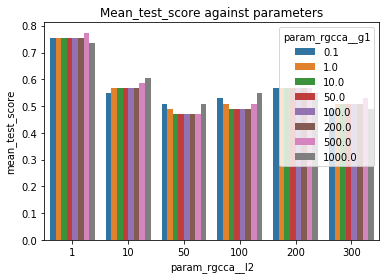

In [50]:
sns.barplot(y='mean_test_score',x='param_rgcca__l2',hue='param_rgcca__g1',data=results)
plt.title('Mean_test_score against parameters');

Résultats encourageants: mais l2 est trop sparse! Recommencer avec une grille de paramètre plus fine.

# Exp 3: GraphNet

Sur le jeu de donnée réduites (4341 gènes en GE présents dans les pathways Kegg, 1229 segments CGH), recherche de paramètres par 5-fold GridSearchCV. Le modèle CCA à 3 blocs (hiérarchique) est contraint par:
- Sur le bloc GE:
    - Contrainte L1 (param_l1)
    - Contrainte RGCCA (tau = 1 par SS)
    - Contrainte GraphNet avec KeggGraph (param_g1)
- Sur le bloc CGH:
    - Contrainte L1 (param_l2)
    - Contrainte RGCCA (tau = 0.77 par SS)
- Sur le bloc Y: Contrainte RGCCA tau = 0 par SS

Les données sont standardisée avant la CCA. Le modèle est évalué avec le score de classification de la localisation par une LDA. Le script pour cette expérience est Subset_Model.py

In [62]:
results = pd.read_csv(data_dir + 'Subset_CV_GraphNet.csv').drop('Unnamed: 0',axis=1)
best_mod = np.load(data_dir + 'best_estimator_CV_GraphNet.npy').item().steps[1][1]

In [63]:
p = results.mean_test_score.max()
results.loc[results.mean_test_score == p].drop('params',axis=1).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_rgcca__g1,param_rgcca__l1,param_rgcca__l2,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
48,115.351738,0.002572,0.660377,0.882281,0.01,1.0,10,1,0.454545,0.880952,...,0.636364,0.904762,0.8,0.860465,0.6,0.860465,9.404293,0.000557,0.135820,0.019821
92,78.574987,0.002479,0.660377,0.872757,0.10,100000.0,10,1,0.454545,0.809524,...,0.636364,0.928571,0.7,0.883721,0.6,0.837209,5.235748,0.000585,0.150783,0.043639


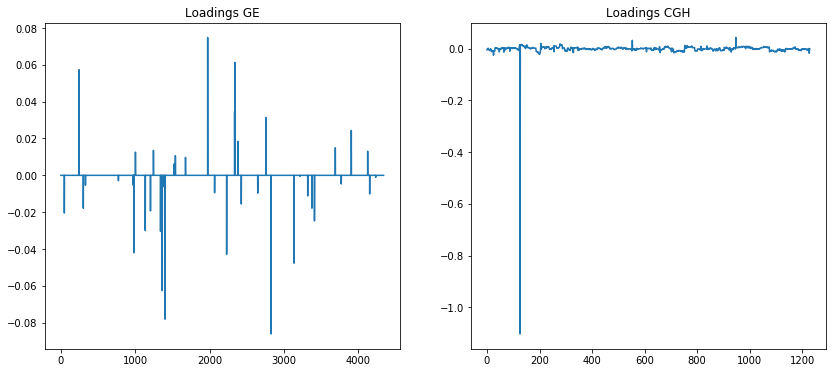

In [64]:
w = best_mod.w
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(w[0])
plt.title('Loadings GE')
plt.subplot(122)
plt.plot(w[1])
plt.title('Loadings CGH');

In [66]:
best_mod.info

{'converged': False, 'num_iter': [20000, 21, 21]}

Number of significant contributions: (29,)


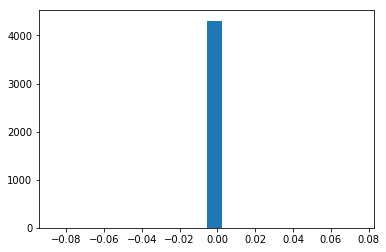

In [54]:
print 'Number of significant contributions: {}'.format(np.where(abs(w[0]) > 1e-2)[0].shape)
plt.hist(w[0],bins=20);

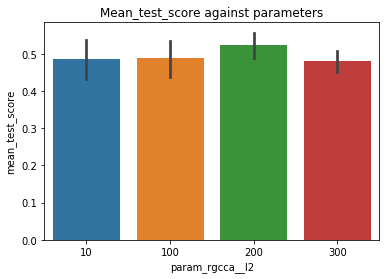

In [58]:
sns.barplot(y='mean_test_score',x='param_rgcca__l2',data=results)
plt.title('Mean_test_score against parameters');

Très beau loading coté GE, mais bcp trop sparse coté CGH alors que les résultats sont peu sensibles au choix de l2.

# Exp 4: Modèle Complet 

In [70]:
results = pd.read_csv(data_dir + 'Subset_CV_GraphTV_sansL1_complete.csv').drop('Unnamed: 0',axis=1)
best_mod = np.load(data_dir + 'best_estimator_CV_GraphTV_sansL1_complete.npy').item().steps[1][1]

In [71]:
p = results.mean_test_score.max()
results.loc[results.mean_test_score == p].drop('params',axis=1).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_rgcca__g1,param_rgcca__l2,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
39,260.301094,0.00237,0.735849,0.840199,1000.0,100,1,0.818182,0.880952,0.636364,...,0.636364,0.880952,0.9,0.790698,0.7,0.767442,39.483389,0.000509,0.104124,0.050451


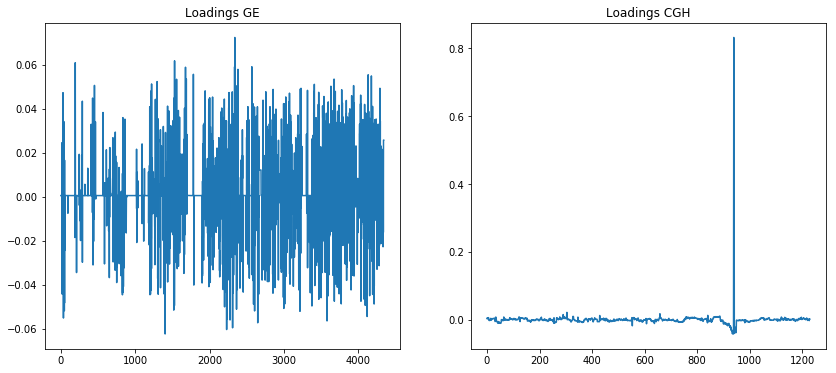

In [72]:
w = best_mod.w
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(w[0])
plt.title('Loadings GE')
plt.subplot(122)
plt.plot(w[1])
plt.title('Loadings CGH');

In [73]:
best_mod.info

{'converged': False, 'num_iter': [20000, 123, 21]}

Number of significant contributions: (1325,)


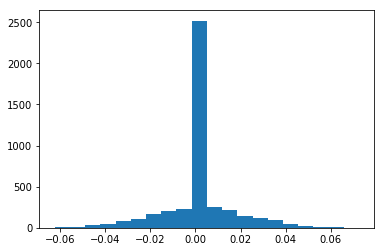

In [74]:
print 'Number of significant contributions: {}'.format(np.where(abs(w[0]) > 1e-2)[0].shape)
plt.hist(w[0],bins=20);

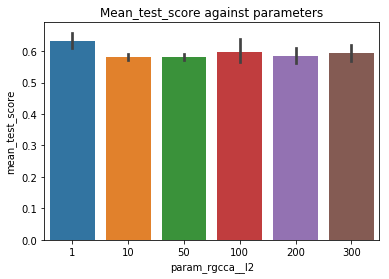

In [75]:
sns.barplot(y='mean_test_score',x='param_rgcca__l2',data=results)
plt.title('Mean_test_score against parameters');

In [ ]:
Subset_CV_GraphNet_sansL1_maxiter3000

# Exp 5: GraphNet sans L1

In [76]:
results = pd.read_csv(data_dir + 'Subset_CV_GraphNet_sansL1_maxiter3000.csv').drop('Unnamed: 0',axis=1)
best_mod = np.load(data_dir + 'best_estimator_CV_GraphNet_sansL1_maxiter3000.npy').item().steps[1][1]

In [77]:
p = results.mean_test_score.max()
results.loc[results.mean_test_score == p].drop('params',axis=1).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_rgcca__g1,param_rgcca__l2,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,98.074753,0.004359,0.754717,0.853821,0.001,1,1,0.909091,0.809524,0.818182,...,0.636364,0.904762,0.7,0.883721,0.7,0.813953,6.678568,0.001012,0.099091,0.037554
5,101.060919,0.007128,0.754717,0.853821,0.010,1,1,0.909091,0.809524,0.818182,...,0.636364,0.904762,0.7,0.883721,0.7,0.813953,3.933800,0.006704,0.099091,0.037554
10,90.243085,0.003629,0.754717,0.877409,0.100,1,1,0.909091,0.857143,0.818182,...,0.636364,0.880952,0.6,0.883721,0.8,0.860465,9.607126,0.000827,0.116588,0.017311


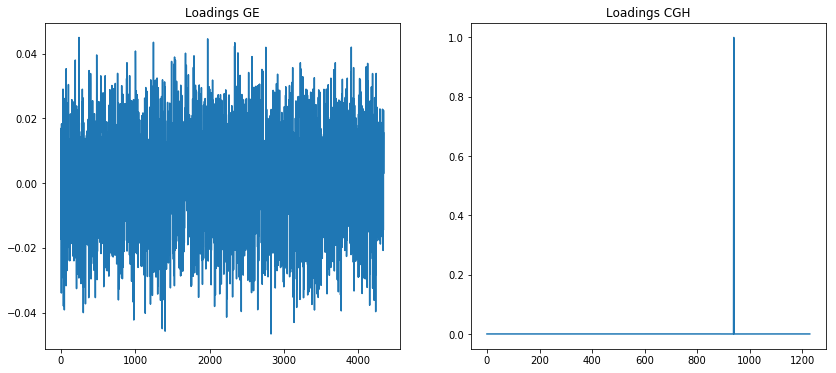

In [78]:
w = best_mod.w
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(w[0])
plt.title('Loadings GE')
plt.subplot(122)
plt.plot(w[1])
plt.title('Loadings CGH');

In [79]:
best_mod.info

{'converged': False, 'num_iter': [17228, 12, 11]}

Number of significant contributions: (2313,)


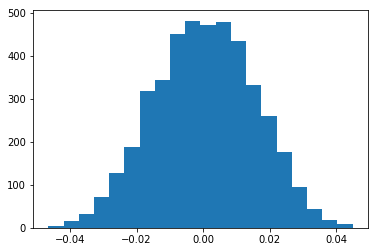

In [80]:
print 'Number of significant contributions: {}'.format(np.where(abs(w[0]) > 1e-2)[0].shape)
plt.hist(w[0],bins=20);

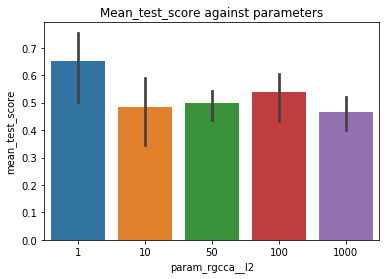

In [81]:
sns.barplot(y='mean_test_score',x='param_rgcca__l2',data=results)
plt.title('Mean_test_score against parameters');

Modèle complètement aléatoire... Pourquoi CGH si sparse?

# Exp 6: GraphNet, pas de L1 (ni GE ni CGH) 

In [83]:
results = pd.read_csv(data_dir + 'Subset_CV_GraphNet_sansL1GCH.csv').drop('Unnamed: 0',axis=1)
best_mod = np.load(data_dir + 'best_estimator_CV_GraphNet_sansL1CGH.npy').item().steps[1][1]

In [84]:
p = results.mean_test_score.max()
results.loc[results.mean_test_score == p].drop('params',axis=1).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_rgcca__g1,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,125.966879,0.004750,0.528302,0.924695,0.001,1,0.636364,0.928571,0.454545,0.928571,0.545455,0.952381,0.5,0.906977,0.5,0.906977,5.002556,0.002069,0.062578,0.016879
1,131.120751,0.003497,0.528302,0.924695,0.010,1,0.636364,0.928571,0.454545,0.928571,0.545455,0.952381,0.5,0.906977,0.5,0.906977,7.977745,0.001357,0.062578,0.016879


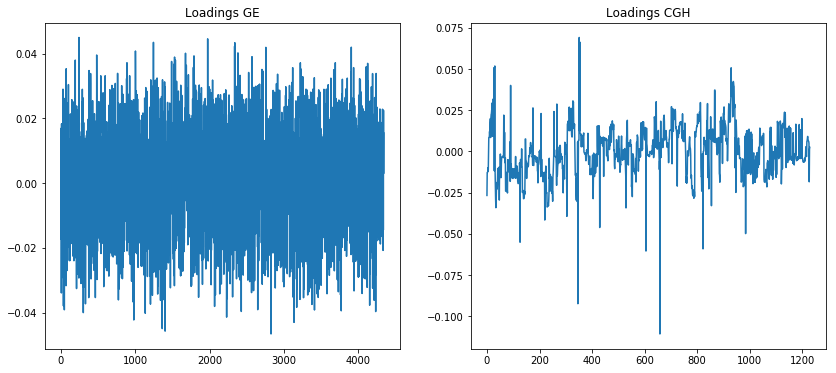

In [86]:
w = best_mod.w
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(w[0])
plt.title('Loadings GE')
plt.subplot(122)
plt.plot(w[1])
plt.title('Loadings CGH');

In [87]:
best_mod.info

{'converged': False, 'num_iter': [16903, 11, 12]}

Number of significant contributions: (2311,)


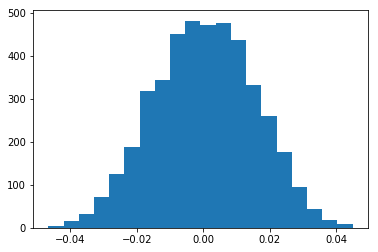

In [88]:
print 'Number of significant contributions: {}'.format(np.where(abs(w[0]) > 1e-2)[0].shape)
plt.hist(w[0],bins=20);

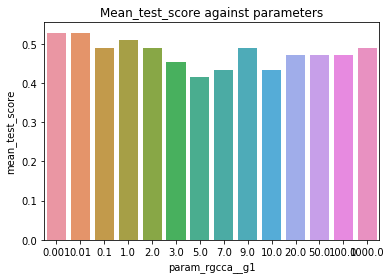

In [90]:
sns.barplot(y='mean_test_score',x='param_rgcca__g1',data=results)
plt.title('Mean_test_score against parameters');

# Exp 7: L1-L1

In [4]:
results = pd.read_csv(data_dir + 'Subset_CV_L1L1.csv').drop('Unnamed: 0',axis=1)
best_mod = np.load(data_dir + 'best_estimator_CV_L1L1.npy').item().steps[1][1]

In [5]:
p = results.mean_test_score.max()
results.loc[results.mean_test_score == p].drop('params',axis=1).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_rgcca__l1,param_rgcca__l2,param_rgcca__tau,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
31,1.000725,0.002257,0.792453,0.859247,10000.0,1,"[1, 0.77, 0]",1,0.727273,0.857143,...,0.636364,0.928571,1.0,0.790698,0.8,0.767442,0.602791,0.000504,0.119223,0.072954


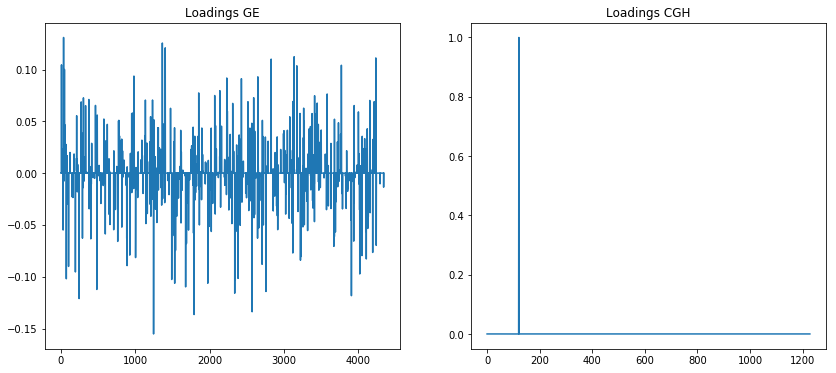

In [6]:
w = best_mod.w
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(w[0])
plt.title('Loadings GE')
plt.subplot(122)
plt.plot(w[1])
plt.title('Loadings CGH');

In [8]:
best_mod.info

{'converged': True, 'num_iter': [2, 2, 1]}

Number of significant contributions GE: (402,)
Number of significant contributions CGH: (1,)


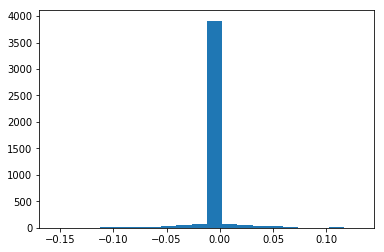

In [146]:
print 'Number of significant contributions GE: {}'.format(np.where(abs(w[0]) > 1e-2)[0].shape)
print 'Number of significant contributions CGH: {}'.format(np.where(abs(w[1]) > 1e-2)[0].shape)
plt.hist(w[0],bins=20);

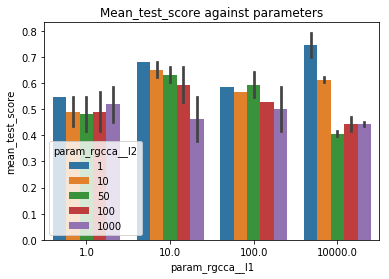

In [147]:
sns.barplot(y='mean_test_score',x='param_rgcca__l1',hue='param_rgcca__l2',data=results)
plt.title('Mean_test_score against parameters');

# Exp 8: Random L1-L1 full GE

## BEST RESULTS HERE 

In [75]:
results = pd.read_csv(data_dir + 'Subset_RandomCV_L1L1_FullGE.csv').drop('Unnamed: 0',axis=1)
best_mod = np.load(data_dir + 'best_estimator_RandomCV_L1L1_FullGE.npy').item().steps[1][1]

In [76]:
p = results.mean_test_score.max()
results.loc[results.mean_test_score == p].drop('params',axis=1).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_rgcca__l1,param_rgcca__l2,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
154,13.567474,0.007449,0.811321,0.943300,330.746432,138.991417,1,0.727273,0.976190,0.909091,...,0.818182,0.952381,1.0,0.953488,0.6,0.953488,0.656691,0.001450,0.136391,0.032432
345,9.728975,0.007039,0.811321,0.933887,300.011150,120.910972,1,0.727273,0.952381,0.909091,...,0.818182,0.952381,1.0,0.930233,0.6,0.953488,3.217352,0.001924,0.136391,0.027870


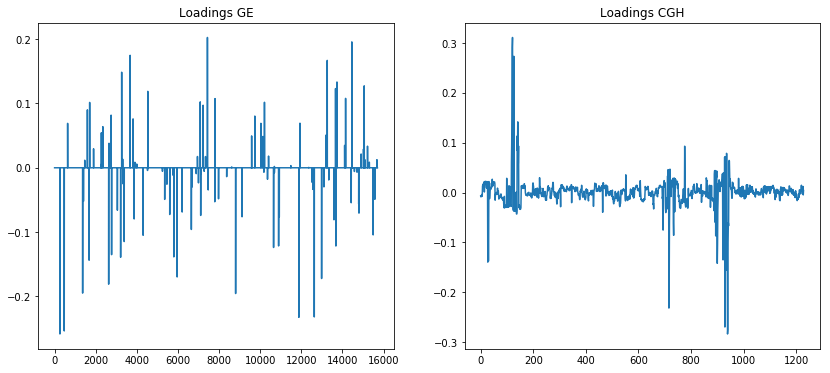

In [91]:
w = best_mod.w
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(w[0])
plt.title('Loadings GE')
plt.subplot(122)
plt.plot(w[1])
plt.title('Loadings CGH');

In [86]:
X2 = data.loc[:,data.columns.str.startswith('CGH')].values
X2 /= np.sqrt(X2.shape[1])
y = data.loc[:,data.columns[-3:]].values
full_data = pd.read_csv(data_dir + 'reproducible_code/Full_Data')
X1 = full_data.loc[:,full_data.columns.str.startswith('GE')].values
X1 /= np.sqrt(X1.shape[1])

In [89]:
data = pd.read_csv(data_dir + 'Data_Subset.csv')
y = data.loc[:,data.columns[-3:]].values
M = 0.77 * np.eye(1229) + (1-0.77) * np.dot(X2.T,X2)
Mw = np.dot(M,w[1])
np.linalg.norm(Mw)

0.8490235919561205

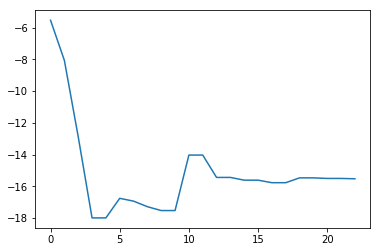

In [92]:
plt.plot(best_mod.info['func_val']);

In [93]:
best_mod.get_params()

{'adj': None,
 'g1': 0,
 'g2': 0,
 'l1': 330.74643164402494,
 'l2': 138.99141657072272,
 'link': None,
 'p': 15702,
 'penalty': None,
 'q': 1229,
 'tau': [1, 0.77, 1.0]}

In [84]:
best_mod.algorithm

Number of significant contributions GE: (88,)
Number of significant contributions CGH: (524,)


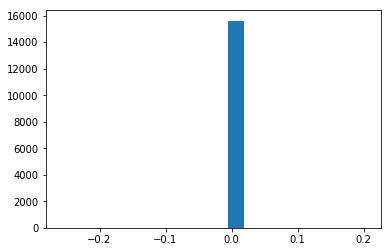

In [94]:
print 'Number of significant contributions GE: {}'.format(np.where(abs(w[0]) > 1e-2)[0].shape)
print 'Number of significant contributions CGH: {}'.format(np.where(abs(w[1]) > 1e-2)[0].shape)
plt.hist(w[0],bins=20);

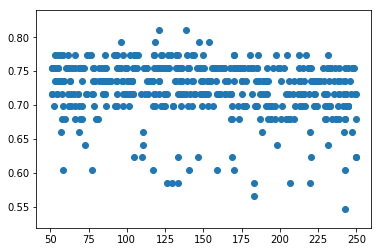

In [83]:
plt.scatter(results.param_rgcca__l2,results.mean_test_score);

# Exp 9: Random L1-L1 bis

In [23]:
results = pd.read_csv(data_dir + 'Subset_RandomCV_L1L1_.csv').drop('Unnamed: 0',axis=1)
best_mod = np.load(data_dir + 'best_estimator_RandomCV_L1L1_.npy').item().steps[1][1]

In [24]:
p = results.mean_test_score.max()
results.loc[results.mean_test_score == p].drop('params',axis=1).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_rgcca__l1,param_rgcca__l2,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
131,2.949344,0.002403,0.698113,0.901550,397,211,1,0.727273,0.928571,0.727273,...,0.636364,0.952381,0.7,0.930233,0.7,0.744186,1.549840,0.000526,0.033848,0.079352
143,4.183260,0.003154,0.698113,0.919823,2974,263,1,0.818182,0.880952,0.818182,...,0.636364,0.952381,0.7,0.930233,0.5,0.906977,1.319425,0.001523,0.119087,0.024170
452,3.701000,0.002139,0.698113,0.910299,3272,204,1,0.818182,0.880952,0.818182,...,0.636364,0.928571,0.7,0.930233,0.5,0.906977,1.506467,0.000991,0.119087,0.018078
456,3.769156,0.002485,0.698113,0.896346,3312,202,1,0.818182,0.880952,0.818182,...,0.636364,0.928571,0.7,0.906977,0.5,0.860465,0.553223,0.000283,0.119087,0.023438


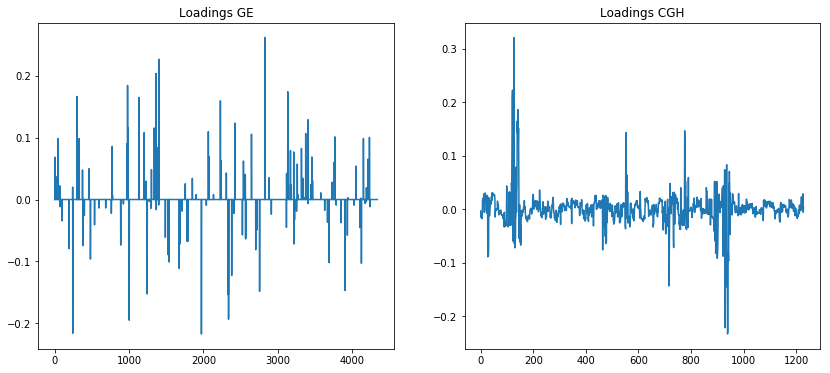

In [25]:
w = best_mod.w
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(w[0])
plt.title('Loadings GE')
plt.subplot(122)
plt.plot(w[1])
plt.title('Loadings CGH');

In [33]:
best_mod.get_params()

{'adj': None,
 'g1': 0,
 'g2': 0,
 'l1': 397,
 'l2': 211,
 'link': None,
 'p': 4341,
 'penalty': None,
 'q': 1229,
 'tau': [1, 0.77, 0]}

In [28]:
best_mod.info['converged']

True

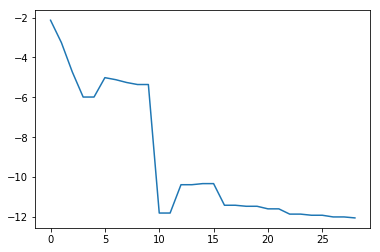

In [26]:
plt.plot(best_mod.info['func_val']);

Number of significant contributions GE: (116,)
Number of significant contributions CGH: (614,)


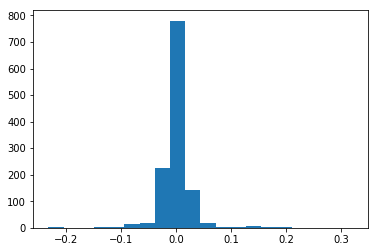

In [30]:
print 'Number of significant contributions GE: {}'.format(np.where(abs(w[0]) > 1e-2)[0].shape)
print 'Number of significant contributions CGH: {}'.format(np.where(abs(w[1]) > 1e-2)[0].shape)
plt.hist(w[1],bins=20);

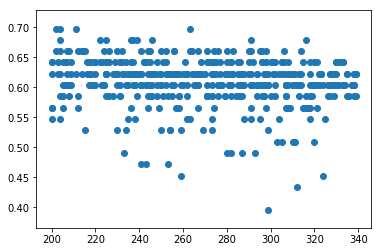

In [32]:
plt.scatter(results.param_rgcca__l2,results.mean_test_score);

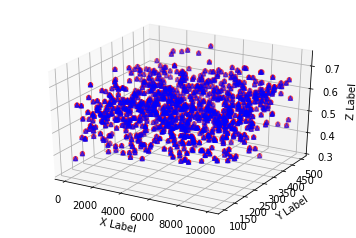

In [176]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = results.param_rgcca__l1
    ys = results.param_rgcca__l2
    zs = results.mean_test_score
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [174]:
results.param_rgcca__l1.shape

(960,)

# Exp 10: L1-L1 GraphNet Fista Subset

In [109]:
results = pd.read_csv(data_dir + 'Subset_CV_L1L1_GraphTV.csv').drop('Unnamed: 0',axis=1)
best_mod = np.load(data_dir + 'best_estimator_Subset_CV_L1L1_GraphTV.npy').item().steps[1][1]

In [110]:
p = results.mean_test_score.max()
results.loc[results.mean_test_score == p].drop('params',axis=1).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_rgcca__g1,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
2,109.398998,0.002847,0.698113,0.872425,0.1,1,0.818182,0.809524,0.727273,0.857143,0.727273,0.904762,0.6,0.906977,0.6,0.883721,10.122977,0.000861,0.083532,0.036214


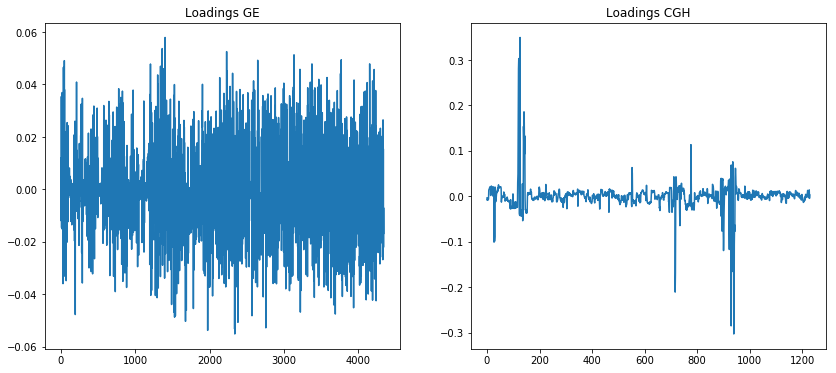

In [111]:
w = best_mod.w
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.plot(w[0])
plt.title('Loadings GE')
plt.subplot(122)
plt.plot(w[1])
plt.title('Loadings CGH');

In [112]:
best_mod.get_params()

{'adj': <4341x4341 sparse matrix of type '<type 'numpy.float64'>'
 	with 24569 stored elements in Compressed Sparse Row format>,
 'g1': 0.1,
 'g2': 0,
 'l1': 300,
 'l2': 120,
 'link': None,
 'p': 4341,
 'penalty': 'GraphTV',
 'q': 1229,
 'tau': [1, 0.77, 1.0]}

In [114]:
best_mod.info['converged']

False

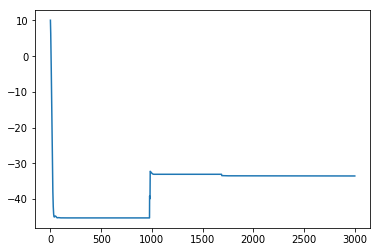

In [115]:
plt.plot(np.asarray(best_mod.info['func_val']).reshape(3002));

Number of significant contributions GE: (1855,)
Number of significant contributions CGH: (462,)


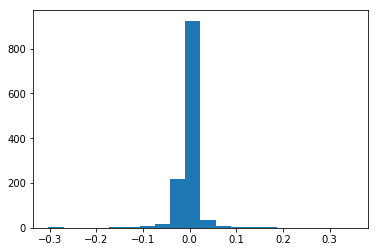

In [116]:
print 'Number of significant contributions GE: {}'.format(np.where(abs(w[0]) > 1e-2)[0].shape)
print 'Number of significant contributions CGH: {}'.format(np.where(abs(w[1]) > 1e-2)[0].shape)
plt.hist(w[1],bins=20);